This notebook is from a course at [DataCamp](https://learn.datacamp.com/) called 'School Budgeting with Machine Learning in Python'

It is from a competion run by [DrivenData](https://www.drivendata.org/competitions/46/box-plots-for-education-reboot/page/85/) that has the following Summary:

> Budgets for schools and school districts are huge, complex, and unwieldy. It's no easy task to digest where and how schools are using their resources. Education Resource Strategies is a non-profit that tackles just this task with the goal of letting districts be smarter, more strategic, and more effective in their spending.

> Your task is a multi-class-multi-label classification problem with the goal of attaching canonical labels to the freeform text in budget line items. These labels let ERS understand how schools are spending money and tailor their strategy recommendations to improve outcomes for students, teachers, and administrators.

The dataset can be obtained by either joining the competition at DrivenData OR by using the `TrainingData.csv` from kaggle located here: [DrivenData's Box-Plots for Education Dataset](https://www.kaggle.com/jeromeblanchet/drivendatas-boxplots-for-education-dataset?select=TrainingData.csv)

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset `TrainingData.csv` which has been previously downloaded and stored locally
df = pd.read_csv('../Drivendata/TrainingData.csv', index_col=0)

In [3]:
# Examine the first 5 records of the dataset
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [4]:
# Obtain the 'info' and review datatypes and number of records (and missing records)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Function                400277 non-null  object 
 1   Use                     400277 non-null  object 
 2   Sharing                 400277 non-null  object 
 3   Reporting               400277 non-null  object 
 4   Student_Type            400277 non-null  object 
 5   Position_Type           400277 non-null  object 
 6   Object_Type             400277 non-null  object 
 7   Pre_K                   400277 non-null  object 
 8   Operating_Status        400277 non-null  object 
 9   Object_Description      375493 non-null  object 
 10  Text_2                  88217 non-null   object 
 11  SubFund_Description     306855 non-null  object 
 12  Job_Title_Description   292743 non-null  object 
 13  Text_3                  109152 non-null  object 
 14  Text_4         

In [5]:
# Print the summary statistics of the numeric columns 'FTE' and 'Total'
df.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


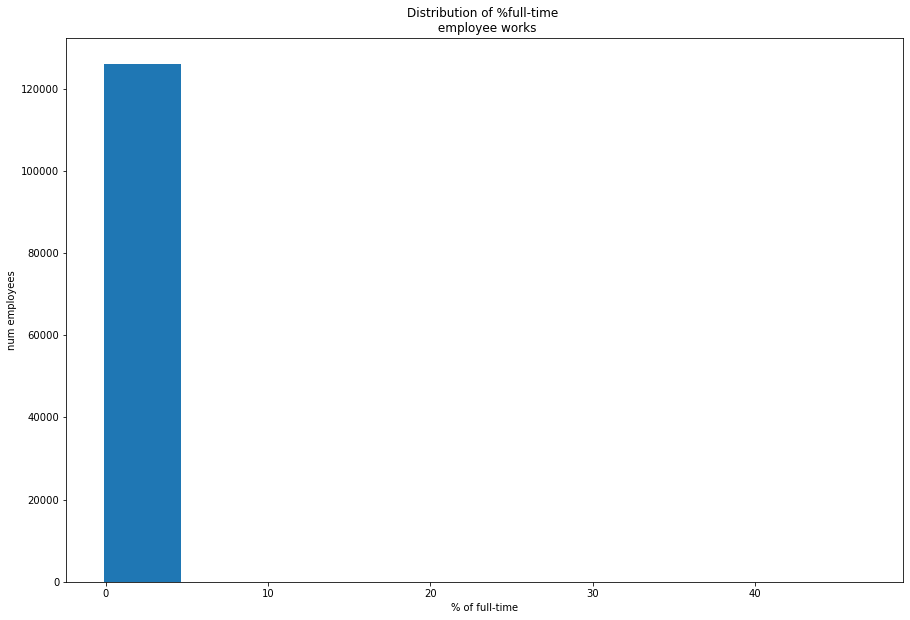

In [6]:
# Create a histogram of the 'FTE' column
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['FTE'].dropna())
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.show()

Clearly the FTE distribution has most of the values around '1' so let's segment out those values and see if we can replot to get some useful information

In [7]:
FTE_big = df.loc[df['FTE'] > 1.1]

In [8]:
len(FTE_big)

144

<AxesSubplot:xlabel='FTE', ylabel='Count'>

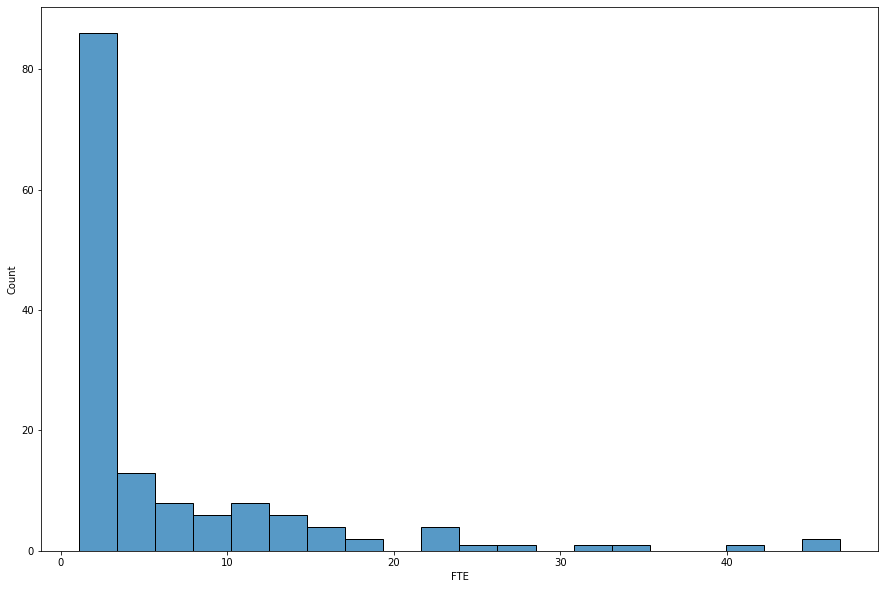

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(FTE_big, x='FTE', bins=20, ax=ax)

Now let's see if we can visualize the values less than 1.1

In [10]:
FTE_most = df.loc[df['FTE'] <= 1.1]

<AxesSubplot:xlabel='FTE', ylabel='Count'>

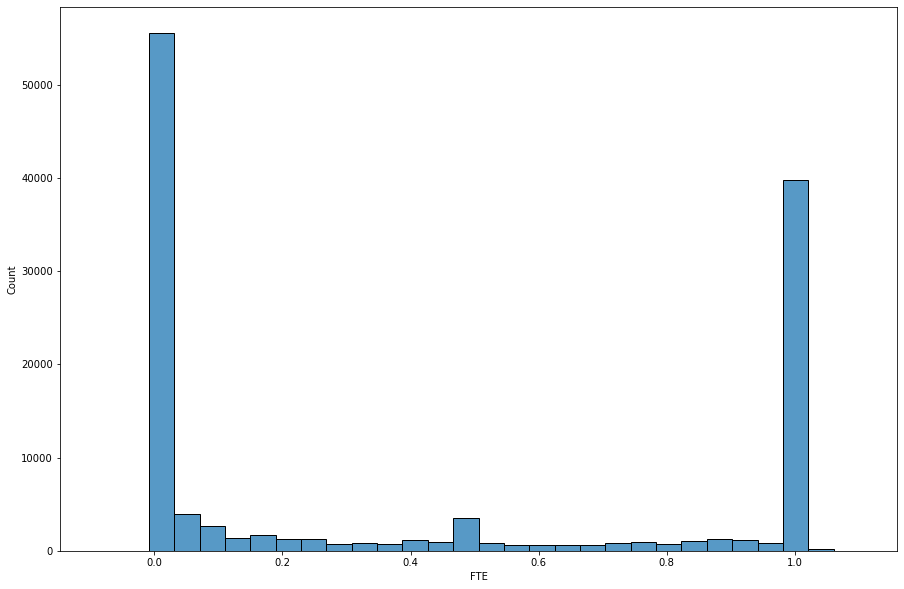

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(FTE_most, x='FTE', ax=ax)

It appears as though most of the values are either 0 or 1 with a small relative number of values between 0 and 1 or greater than 1

## Encode the labels of the dataset

From the documentation of this competition we can find [which columns are labels](https://www.drivendata.org/competitions/46/box-plots-for-education-reboot/page/86/#labels_list) and then encode them.
The above link shows which columns are labels as such:
![label_columns](images/label_example.png)

In [12]:
# Use a lambda function to cast the label columns astype 'category'
# label_columns = ['Function','Object_Type','Operating_Status','Position_Type','Pre_K','Reporting','Sharing','Student_Type','Use']

# for col in label_columns:
#     df[col] = df[col].astype('category')

In [13]:
# Use a lambda function to cast the label columns astype 'category'
label_columns = ['Function','Object_Type','Operating_Status','Position_Type','Pre_K','Reporting','Sharing','Student_Type','Use']
categorize_label = lambda x : x.astype('category')
df[label_columns] = df[label_columns].apply(categorize_label, axis=0)
df[label_columns].dtypes

Function            category
Object_Type         category
Operating_Status    category
Position_Type       category
Pre_K               category
Reporting           category
Sharing             category
Student_Type        category
Use                 category
dtype: object

In [14]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[label_columns].apply(pd.Series.nunique)

Text(0, 0.5, 'Number of unique values')

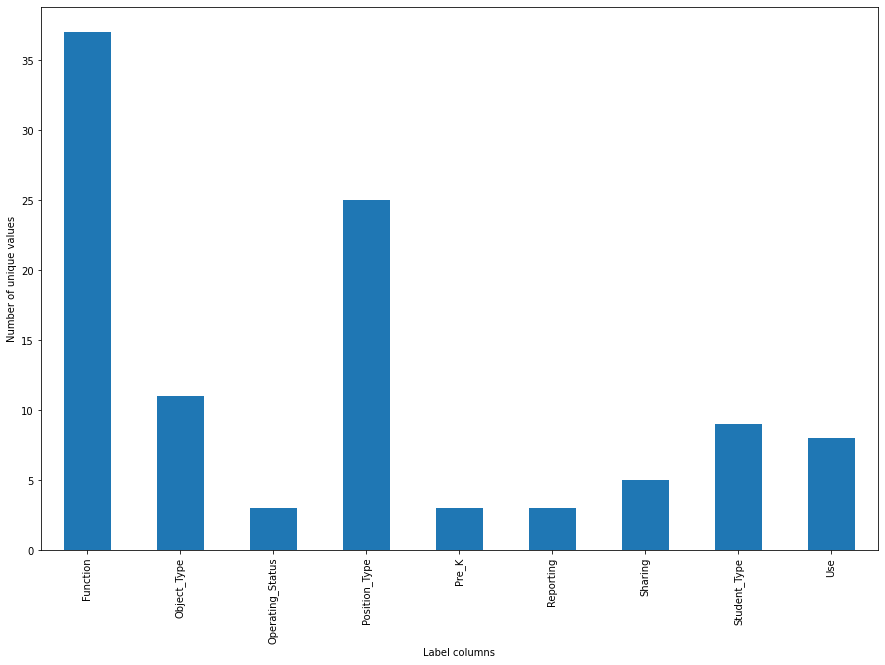

In [15]:
# Plot number of unique values for each label
fig, ax = plt.subplots(figsize=(15,10))
num_unique_labels.plot(kind='bar')
# Label the axes
plt.xlabel('Label columns')
plt.ylabel('Number of unique values')

## How do we measure success?
- Accuracy can be misleading when classes are imbalanced
    - Legitmate email: 99%, Spam: 1%
    - Model that never predicts spam will be 99% accurate!
- Metric used in this problem: log loss
    - Loss function
    - Measure of error
    - Want to minimize the error (unlike accuracy)
- Log loss binary classification
$$ log loss = -\frac{1}{N} \sum^{N}_{i=1}(y_i \log(p_i)) + (1- y_i)\log(1-p_i)) $$
    - Actual value: $y: {1=\text{yes}, 0=\text{no}}$
    - Prediction (probability that the value is 1): $p$

## Create log loss function

To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function ```compute_log_loss()```.

In [16]:
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and 
    actual when these are 1D arrays.
    
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1
    :param eps (optional): log(0) is inf , so we need to offset our 
                            predicted values slightly by eps from 0 to 1.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
                       + (1 - actual)
                       * np.log(1 - predicted))
    return loss

In [17]:
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [18]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


## Time to build a simple model first
- Always a good approach to start with a very simple model
- Gives a sense of how challengeing the problem is
- Many more things can go wrong in complex models
- How much signal can we pull out using basic methods?
- Train basic model on numeric data only
    - Want to go from raw data to predictions quickly
- Multiclass logistic regression
    - Train classifier on each label separately and use those to predict
- Format predictions and save to csv
- Compute log loss score
- Splitting the multi-class dataset
    - Recall: Train-test split
        - Will not work here
        - May end up with labels in test set that never appear in training set
    -  Solution: ```StratifiedShyffleSplit```
        - Only works with a single target variable
        
### Setting up a train-test split in scikit-learn

The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least ```min_count``` examples of each label appear in each split: ```multilabel_train_test_split```.

In [19]:
from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:   # check if the input matrix has values other than [0,1] and throw error if True
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():  # check if any column has less than min_count number of rows with value = 1 
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:      # If size is 1 or less set it to that fraction of all the records
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:   # Set size to (# columns * min_count) if size is less than that 
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count
    # If seed wasn't set then create a random seed number
    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    # if input matrix is a dataframe then get index numbers and values if not then create index numbers
    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

We will start with a simple model that uses just the numeric columns of our DataFrame when calling ```multilabel_train_test_split```. 

We will use -1000 for null values to distinguish them from 0

In [20]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [21]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000).copy()

In [22]:
# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[label_columns])

In [23]:
# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only, label_dummies,
                                                               size=0.2, seed=123)

In [24]:
# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")
print(X_test.info())
print("\ny_train info:")
print(y_train.info())
print("\ny_test info:")
print(y_test.info())

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   FTE     320222 non-null  float64
 1   Total   320222 non-null  float64
dtypes: float64(2)
memory usage: 7.3 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 413949
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FTE     80055 non-null  float64
 1   Total   80055 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Columns: 104 entries, Function_Aides Compensation to Use_Untracked Budget Set-Aside
dtypes: uint8(104)
memory usage: 34.2 MB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 413949
Columns: 104 entries, Functio

### Training a model
With split data in hand, we're only a few lines away from training a model.

In this exercise, we will import the logistic regression and one versus rest classifiers in order to fit a multi-class logistic regression model to the ```NUMERIC_COLUMNS``` of our feature data.

Then we'll test and print the accuracy with the ```.score()``` method to see the results of training.

**Before we train!** Remember, we're ultimately going to be using logloss to score our model, so don't worry too much about the accuracy here. Keep in mind that we're throwing away all of the text data in the dataset - that's by far most of the data! So we won't get our hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print(f"Accuracy: {clf.score(X_test, y_test)}")

Accuracy: 0.0


The workflow didn't cause any errors but the model scored the lowest possible score of 0.0. This isn't a surprise since we discarded ALL of the text data and only kept two columns of numeric data. 

# Make preliminary predictions

We are ready to make some preliminary predictions for model development purposes. The competition has a 'holdout data' csv with unknown labels for us to use that can be found here: [testdata.csv](https://www.kaggle.com/jeromeblanchet/drivendatas-boxplots-for-education-dataset?select=TestData.csv)

In [26]:
# Load the holdout data that we've downloaded and put into a local directory
holdout = pd.read_csv('../DrivenData/TestData.csv', index_col=0, low_memory=False)

In [27]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50064 entries, 180042 to 249087
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Object_Description      48330 non-null  object 
 1   Program_Description     44811 non-null  object 
 2   SubFund_Description     16111 non-null  object 
 3   Job_Title_Description   32317 non-null  object 
 4   Facility_or_Department  2839 non-null   object 
 5   Sub_Object_Description  33612 non-null  object 
 6   Location_Description    37316 non-null  object 
 7   FTE                     19605 non-null  float64
 8   Function_Description    46866 non-null  object 
 9   Position_Extra          13813 non-null  object 
 10  Text_4                  2814 non-null   object 
 11  Total                   49404 non-null  float64
 12  Text_2                  4641 non-null   object 
 13  Text_3                  5784 non-null   object 
 14  Fund_Description        39586 no

In [28]:
# Generate predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

## Write out results to csv and submit to competition to get scoring

We will write out the predictions to a csv in the correct format and then use our LogLoss metric from before to evaluate our performance.

In [33]:
# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[label_columns], prefix_sep='__').columns,
                             index=holdout.index,
                             data=predictions)

In [34]:
# Save prediction_df to csv
prediction_df.to_csv('../DrivenData/predictions.csv')

In [35]:
# Create functions to perform multi class log loss and also score submissions

BOX_PLOTS_COLUMN_INDICES = [range(0, 37),
 range(37, 48),
 range(48, 51),
 range(51, 76),
 range(76, 79),
 range(79, 82),
 range(82, 87),
 range(87, 96),
 range(96, 104)]


def _multi_multi_log_loss(predicted,
                          actual,
                          class_column_indices=BOX_PLOTS_COLUMN_INDICES,
                          eps=1e-15):
    """ Multi class version of Logarithmic Loss metric as implemented on
    DrivenData.org
    """
    class_scores = np.ones(len(class_column_indices), dtype=np.float64)
    
    # calculate log loss for each set of columns that belong to a class:
    for k, this_class_indices in enumerate(class_column_indices):
        # get just the columns for this class
        preds_k = predicted[:, this_class_indices].astype(np.float64)
        
        # normalize so probabilities sum to one (unless sum is zero, then we clip)
        preds_k /= np.clip(preds_k.sum(axis=1).reshape(-1, 1), eps, np.inf)

        actual_k = actual[:, this_class_indices]

        # shrink predictions so
        y_hats = np.clip(preds_k, eps, 1 - eps)
        sum_logs = np.sum(actual_k * np.log(y_hats))
        class_scores[k] = (-1.0 / actual.shape[0]) * sum_logs
        
    return np.average(class_scores)

def score_submission(pred_path='./', holdout_path='https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetLabelsSample.csv'):
    # this happens on the backend to get the score
    holdout_labels = pd.get_dummies(
        pd.read_csv(holdout_path, index_col=0)
        .apply(lambda x: x.astype('category'), axis=0)
    )
    
    preds = pd.read_csv(pred_path, index_col=0)
    
    # make sure that format is correct
    assert (preds.columns == holdout_labels.columns).all()
    assert (preds.index == holdout_labels.index).all()
    
    return _multi_multi_log_loss(preds.values, holdout_labels.values)

In [36]:
# Submit the predictions for scoring: score
score = score_submission(pred_path='../DrivenData/predictions.csv')

AssertionError: 

The holdout data file is different than the TestData.csv so the Assert statement fails because the columns are different.
However, if we submit the predictions.csv to the competition we get a score of 1.4456
![First Submission](./Images/submission1.png)

## Use CountVectorizer() on column of main dataset

In [47]:
# Import dependencies
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
# Set up a regular expression that will split strings on whitespace
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

In [49]:
# Replace NaN values with empty space
df.Position_Extra.fillna('', inplace=True)

In [50]:
# Instantiate the CountVectorizer
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

In [51]:
# Use 'fit' on the 'clean' column
vec_alphanumeric.fit(df.Position_Extra)

CountVectorizer(token_pattern='[A-Za-z0-9]+(?=\\s+)')

In [43]:
# Print the number of tokens and the first 15 tokens
print(f"There are {})

134338                      KINDERGARTEN
206341     BUILDING IMPROVEMENT SERVICES
326408             Instruction - Regular
364634    GENERAL MIDDLE/JUNIOR HIGH SCH
47683      GENERAL HIGH SCHOOL EDUCATION
                       ...              
109283                                  
102430      INSTRUCTIONAL STAFF TRAINING
413949                              Misc
433672            MEDIA SUPPORT SERVICES
415831             Accelerated Education
Name: Program_Description, Length: 400277, dtype: object